In [145]:
import torch
import os
import numpy as np
from models import SAVi
from data import gestalt
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
device = "cuda" if torch.cuda.is_available() else "cpu"
dl = DataLoader(gestalt.Gestalt(root_dir="/om/user/yyf/CommonFate/scenes"))

In [147]:
batch = next(iter(dl))

images = batch['images']
flows = batch['flows']
masks = batch['masks']

In [148]:
batch_info = dl.dataset.get_info(0)

In [149]:
batch_info[-1]

'/om/user/yyf/CommonFate/scenes/voronoi/superquadric_1/scene_001'

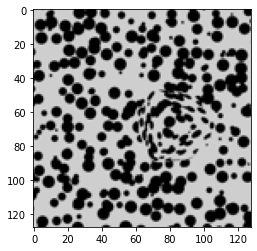

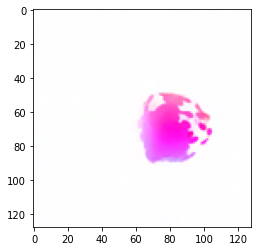

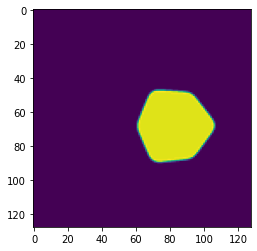

In [150]:
plt.imshow(images[0][0].cpu().numpy().transpose(2, 1, 0))
plt.show()
plt.imshow(flows[0][0].cpu().numpy().transpose(2, 1, 0))
plt.show()
plt.imshow(masks[0][0].cpu().numpy().transpose(2, 1, 0))
plt.show()

In [151]:
model = SAVi.SlotAttentionVideo().float().to(device)
out = model(images, cues=None)

1 32
torch.Size([1, 128, 128, 4]) torch.Size([1, 128, 128, 64]) torch.Size([1, 128, 128, 64])


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!